# Этапы формирования цены
## Определение способных повлиять на цену товара факторов, не зависящих от компании
## Определение цели, с которой производится расчет цены на товар или услугу
## Выбор способа формирования стоимости
## Разработка стратегии, по которой будет определяться цена
## Осуществление рыночной корректировки стоимости товара или услуги


# План :
### EDA

### Прогнозирование временных рядов

### План прогноза спроса

### Эластичность на примере

### План разработки приложения для ценообразования

## EDA

In [10]:
import pandas as pd
import numpy as np

In [71]:
!ls

1510001_agr.csv       ZX10208_agr.csv       second_notebook.ipynb
1510002_agr.csv       conc_df.csv           sku_dict.csv
1510003_agr.csv       promo_1510002.csv


In [2]:
sku_dict= pd.read_csv('sku_dict.csv')

In [3]:
sku_dict.head()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01 00:00:00
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01 00:00:00
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01 00:00:00


In [4]:
sku_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_id           10000 non-null  int64 
 1   fincode          10000 non-null  object
 2   ui1_code         10000 non-null  object
 3   ui2_code         10000 non-null  object
 4   ui3_code         10000 non-null  object
 5   vendor           10000 non-null  object
 6   brand_code       10000 non-null  object
 7   creation_date    10000 non-null  object
 8   expiration_date  10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


In [5]:
for col in sku_dict.columns:
    print(col,sku_dict['{}'.format(col)].nunique())

sku_id 10000
fincode 31
ui1_code 46
ui2_code 109
ui3_code 804
vendor 25
brand_code 63
creation_date 669
expiration_date 582


In [6]:
sku_dict.fincode.unique()

array(['A1', 'UA', 'G9', 'AQ', '6L', '4W', 'ZR', '15', 'SI', 'BY', '70',
       'BJ', 'RI', 'MB', 'YT', 'K9', 'FE', 'Z8', 'GY', 'M2', 'XG', 'LT',
       'EH', 'ZX', 'H7', '8J', 'AG', 'B1', 'Q5', 'GV', 'B0'], dtype=object)

In [7]:
sku_dict.ui1_code.unique()

array(['A10', 'UA1', 'G91', 'AQ1', '6L1', '4W1', 'ZR1', '151', 'SI1',
       'BY1', '701', 'BJ1', 'RI1', 'MB1', 'YT1', 'K91', 'FE1', 'Z81',
       'GY1', 'M21', 'XG1', 'LT1', 'EH1', 'ZX1', 'H71', '8J1', 'AG1',
       'B11', 'Q51', 'GV1', 'B01', 'EH0', '700', 'M20', 'K90', 'GV0',
       'ZX0', 'B00', 'G90', 'SI0', 'BJ0', 'RI0', 'UA0', 'YT0', 'Z80',
       '4W0'], dtype=object)

In [8]:
sku_dict.ui2_code.unique()

array(['A1000', 'UA100', 'G9100', 'AQ100', '6L100', '4W100', 'ZR101',
       '15100', 'SI100', 'BY100', '70102', 'BJ100', 'G9101', 'RI100',
       'MB100', 'YT102', 'MB101', 'K9102', 'FE100', 'Z8100', 'GY100',
       'UA102', 'M2100', 'XG100', 'LT102', '70101', 'EH100', 'BY101',
       'LT100', 'ZX101', 'H7100', 'XG102', '4W102', 'ZR100', '8J100',
       'AG100', 'AG101', 'K9100', 'Z8101', 'MB102', 'B1100', '6L102',
       'Q5100', 'GV102', 'B0100', 'AQ101', 'GV100', '70100', 'ZR102',
       'UA101', 'GV101', 'M2102', 'LT101', 'GY101', 'YT100', 'AG102',
       'H7101', '6L101', 'SI101', 'B1102', '8J102', 'RI101', 'B1101',
       'BJ102', 'RI102', 'AQ102', 'GY102', 'EH102', 'Q5102', 'EH101',
       '4W101', 'BJ101', 'BY102', 'FE101', 'G9102', 'M2101', '15101',
       'B0102', 'XG101', 'ZX100', 'SI102', 'B0101', '15102', '8J101',
       'K9101', 'Q5101', 'EH000', 'YT101', 'H7102', 'ZX102', 'FE102',
       'Z8102', '70000', 'M2000', 'K9000', 'EH002', 'GV000', 'ZX001',
       'B0000', 'G90

In [9]:
sku_dict.ui3_code.unique()

array(['A1000001', 'UA10000', 'G910003', 'AQ10000', '6L10005', '4W10000',
       'ZR10100', 'AQ10008', '1510004', 'SI10006', 'AQ10005', 'BY10001',
       '7010200', 'AQ10001', 'BJ10001', 'G910100', 'RI10007', 'MB10006',
       'YT10204', 'MB10101', 'K910201', 'FE10002', 'Z810000', 'GY10000',
       'UA10200', 'M210008', 'UA10005', 'XG10002', 'LT10200', 'YT10200',
       '7010100', 'EH10000', 'BY10106', 'LT10007', 'ZX10102', 'H710000',
       'XG10207', 'XG10004', 'BY10000', '4W10207', 'ZR10000', '8J10004',
       'H710005', 'AG10002', 'Z810005', 'AG10100', 'K910005', 'UA10203',
       'EH10007', 'G910007', 'G910000', 'Z810100', '8J10003', 'ZR10005',
       'MB10201', 'LT10000', 'SI10005', 'B110000', '6L10207', 'BJ10000',
       'Q510000', 'GV10200', 'B010000', 'LT10207', 'AQ10105', 'EH10004',
       'M210000', 'GV10000', 'K910200', '7010000', 'ZR10208', 'UA10100',
       'ZX10104', 'GV10100', 'ZR10006', 'XG10000', '7010203', '1510007',
       'AG10000', '1510000', 'RI10000', 'LT10006',

In [10]:
sku_dict.brand_code.value_counts()

4WL34OA2    459
8FYENEWM    439
THSTSG81    384
02Q78ADY    304
MMC2P4Y3    294
           ... 
SKXXW8V9     59
JK4UKBI2     52
74CKJ9XQ     51
H1BWFJRN     33
A1000001      1
Name: brand_code, Length: 63, dtype: int64

In [11]:
sku_dict.vendor.value_counts()

UEYMBB    458
TJYT3A    447
71SM2O    445
7I77VL    440
LDLJFP    435
T9BUA7    434
2CI2A8    432
UH2WWF    430
SJP384    425
AWD3XQ    425
4HJSP5    419
BLW9FG    418
B4TA32    411
3GFIMK    411
SHL570    408
AO59EQ    403
VWHZMG    400
VZ44WY    399
H2OK0Z    399
FI3ASO    398
JSOSD5    398
GVL335    391
4O4WSH    390
CHQKSO    383
A10001      1
Name: vendor, dtype: int64

In [12]:
sku_dict.groupby(['fincode', 'ui1_code']).sku_id.agg('count').reset_index().sort_values('fincode')

,fincode,ui1_code,sku_id
0,15,151,326
1,4W,4W0,1
2,4W,4W1,345
3,6L,6L1,305
4,70,700,1
5,70,701,305
6,8J,8J1,322
7,A1,A10,1
8,AG,AG1,309
9,AQ,AQ1,347


In [13]:
sku_dict.groupby(['ui1_code', 'ui3_code']).sku_id.agg('count').reset_index().sort_values('ui1_code')

,ui1_code,ui3_code,sku_id
0,151,1510000,123
23,151,1510208,4
22,151,1510207,2
21,151,1510206,2
20,151,1510205,1
...,...,...,...
778,ZX1,ZX10001,11
777,ZX1,ZX10000,112
802,ZX1,ZX10207,1
789,ZX1,ZX10103,1


## ZX10208 Group

In [14]:
ZX10208_df = pd.read_csv('ZX10208_agr.csv')

In [15]:
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,NaN,1
4,2018-05-03,59567,176.38,2


In [16]:
ZX10208_df.SKU.unique()

array([59567, 82947])

In [17]:
sku_dict[sku_dict.sku_id.isin(ZX10208_df.SKU.unique())]

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
1484,59567,ZX,ZX1,ZX102,ZX10208,SJP384,3FAIRJ4W,2018-04-16,2019-04-21 00:00:00
4048,82947,ZX,ZX1,ZX102,ZX10208,TJYT3A,3FAIRJ4W,2018-09-26,2200-01-01 00:00:00


In [18]:
ZX10208_df.dates = pd.to_datetime(ZX10208_df.dates)

In [19]:
ZX10208_df[ZX10208_df.SKU == 82947].dates.describe()

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     103
unique                    103
top       2019-09-09 00:00:00
freq                        1
first     2018-09-28 00:00:00
last      2019-12-28 00:00:00
Name: dates, dtype: object

In [22]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

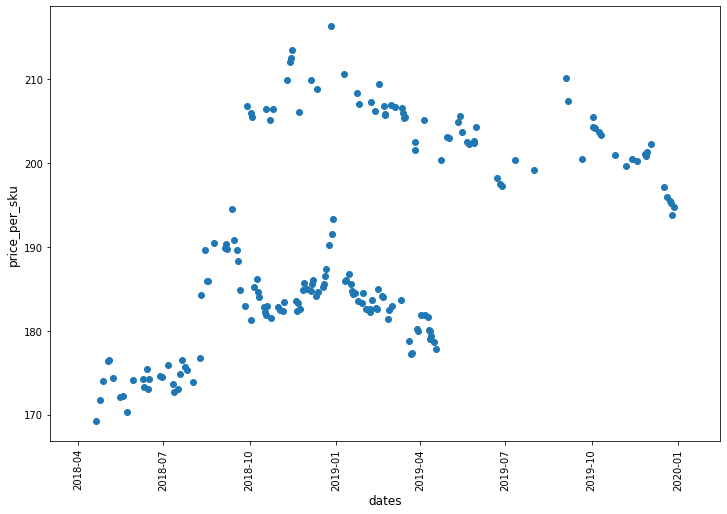

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(x='dates', y='price_per_sku', data=ZX10208_df)
plt.ylabel('price_per_sku', fontsize=12)
plt.xlabel('dates', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
# week month and year
ZX10208_df['week_num'] = ZX10208_df.dates.dt.week
ZX10208_df['year'] = ZX10208_df.dates.dt.year
ZX10208_df['months'] = ZX10208_df.dates.dt.month
ZX10208_df['year_week'] =  ZX10208_df['year'].astype(str) + '_' + ZX10208_df['week_num'].astype(str)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [23]:
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17
2,2018-04-27,59567,174.04,3,17,2018,4,2018_17
3,2018-04-30,59567,NaN,1,18,2018,4,2018_18
4,2018-05-03,59567,176.38,2,18,2018,5,2018_18


In [24]:
ZX10208_gr = ZX10208_df.groupby(['year_week','SKU']).price_per_sku.mean().reset_index()

In [25]:
ZX10208_gr = ZX10208_gr.rename(columns={'price_per_sku':'mean_per_week'})

In [26]:
ZX10208_df = ZX10208_df.merge(ZX10208_gr, how='left', on=['year_week','SKU'])

In [27]:
ZX10208_df

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week,mean_per_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16,169.190
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17,172.875
2,2018-04-27,59567,174.04,3,17,2018,4,2018_17,172.875
3,2018-04-30,59567,NaN,1,18,2018,4,2018_18,176.435
4,2018-05-03,59567,176.38,2,18,2018,5,2018_18,176.435
...,...,...,...,...,...,...,...,...,...
254,2019-12-23,82947,NaN,1,52,2019,12,2019_52,194.810
255,2019-12-24,82947,195.46,2,52,2019,12,2019_52,194.810
256,2019-12-25,82947,195.21,1,52,2019,12,2019_52,194.810
257,2019-12-26,82947,193.79,1,52,2019,12,2019_52,194.810


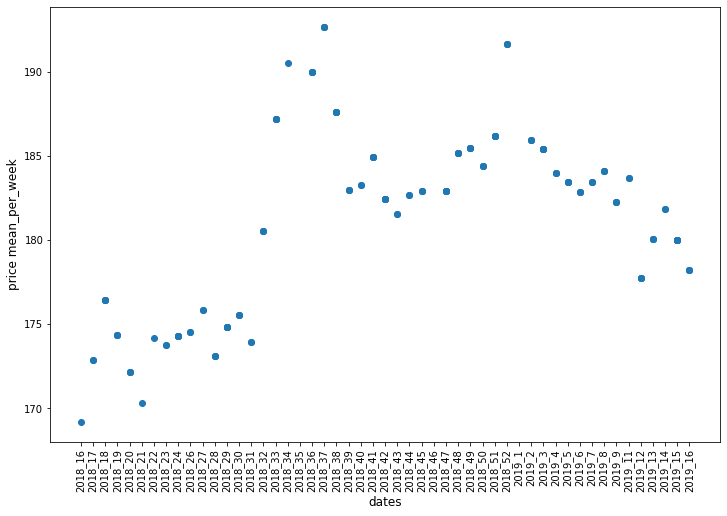

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(x='year_week', y='mean_per_week', data=ZX10208_df[ZX10208_df.SKU==59567].sort_values('dates'))
plt.ylabel('price mean_per_week', fontsize=12)
plt.xlabel('dates', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [29]:
pivot_t = ZX10208_df.pivot_table(index='dates',columns='SKU', values='price_per_sku')

In [30]:
pivot_t

SKU,59567,82947
dates,,
2018-04-20,169.19,NaN
2018-04-24,171.71,NaN
2018-04-27,174.04,NaN
2018-05-03,176.38,NaN
2018-05-04,176.49,NaN
...,...,...
2019-12-21,NaN,195.96
2019-12-24,NaN,195.46
2019-12-25,NaN,195.21


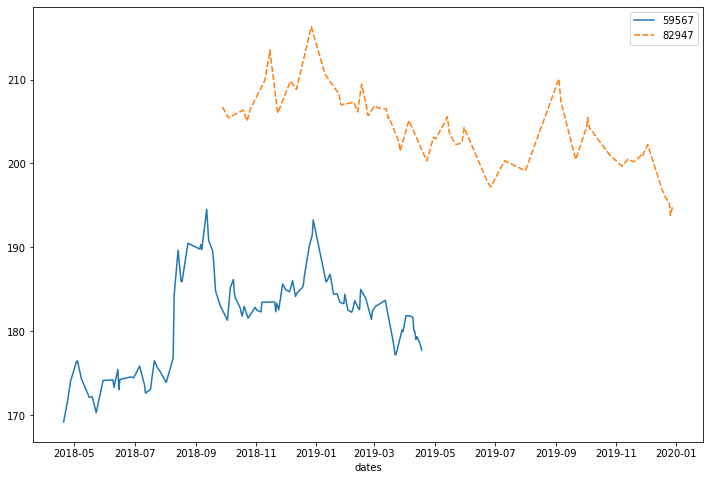

In [31]:
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

# 1510001 group

In [32]:
df_1510001 = pd.read_csv('1510001_agr.csv')

In [33]:
df_1510001

,dates,SKU,price_per_sku,num_purchases
0,2018-08-02,39665,85.940,1
1,2018-08-03,39665,85.940,1
2,2018-08-04,39665,85.940,1
3,2018-08-05,39665,85.940,1
4,2018-08-06,39665,86.038,1
...,...,...,...,...
3935,2019-12-25,36108,80.094,2
3936,2019-12-28,36108,80.094,2
3937,2019-12-29,36108,80.094,1
3938,2019-12-30,36108,76.205,1


In [34]:
df_1510001.dates = pd.to_datetime(df_1510001.dates)

In [35]:
pivot_t = df_1510001.pivot_table(index='dates',columns='SKU',values='price_per_sku')

In [36]:
pivot_t

SKU,27240,27885,34130,36108,39665,40194,45164,48671,49596,59631,63995,70252,70315,72449
dates,,,,,,,,,,,,,,
2018-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN
2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.882,NaN,NaN
2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.882,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,128.652,NaN,104.536,NaN,95.978,135.931,82.652,152.815,148.536,NaN,138.536,NaN,71.931,156.257
2019-12-28,NaN,NaN,NaN,80.094,95.978,NaN,82.652,152.815,NaN,108.536,138.536,117.815,71.931,156.257
2019-12-29,128.652,NaN,104.536,80.094,95.978,135.931,82.652,NaN,148.536,NaN,138.536,NaN,71.931,156.257


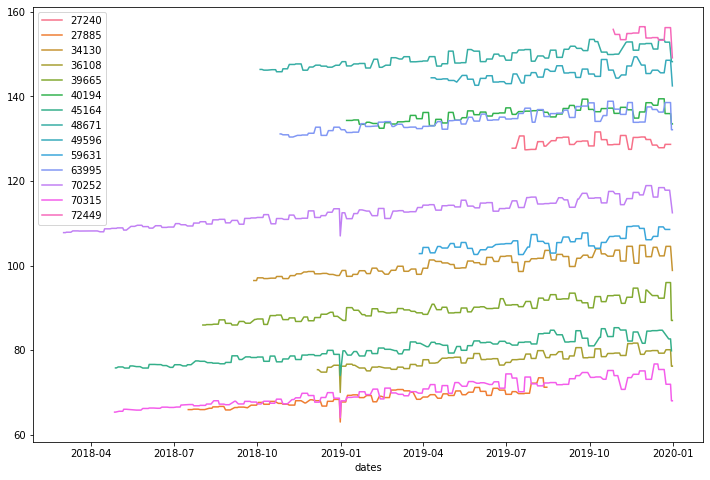

In [37]:
plt.figure(figsize=(12,8))
sns.lineplot(data=pivot_t,dashes=False)

In [38]:
df_1510001.SKU.nunique()

14

In [39]:
df_1510001.SKU.unique()

array([39665, 63995, 70252, 34130, 70315, 27885, 59631, 48671, 72449,
       49596, 27240, 45164, 40194, 36108])

In [40]:
df_1510001[df_1510001.SKU == 39665].num_purchases.describe()

count    354.000000
mean       1.519774
std        0.694702
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: num_purchases, dtype: float64

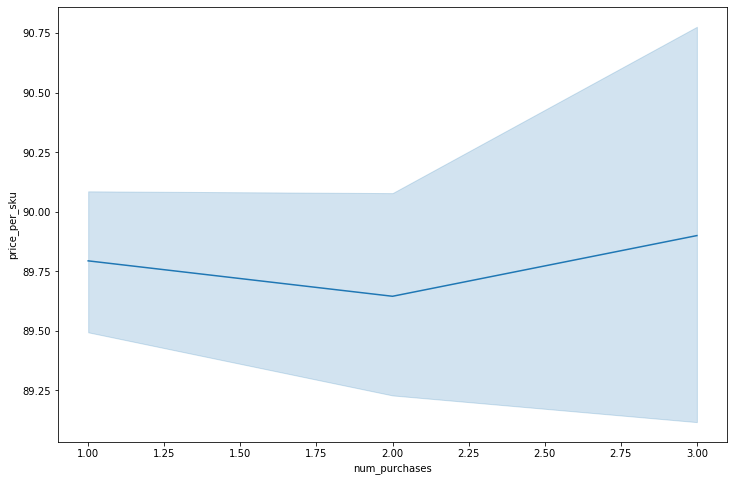

In [41]:
plt.figure(figsize=(12,8))

sns.lineplot(x =df_1510001[df_1510001.SKU == 39665].num_purchases , y = df_1510001[df_1510001.SKU == 39665].price_per_sku)


# 1510002 group

In [42]:
df_1510002 = pd.read_csv('1510002_agr.csv')

In [43]:
df_1510002.dates = pd.to_datetime(df_1510002.dates)

In [44]:
pivot_t = df_1510002.pivot_table(index='dates',columns='SKU',values='num_purchases')

In [45]:
pivot_t

SKU,10334,17812,36096,38767,43678,57561,64619,68211,69997,72784,83329,90611,98255
dates,,,,,,,,,,,,,
2018-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2018-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2018-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2018-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2018-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,9.0,3.0,13.0,NaN,9.0,NaN,4.0,NaN,NaN,7.0,9.0,NaN,NaN
2019-12-28,9.0,4.0,13.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2019-12-29,8.0,NaN,14.0,9.0,NaN,NaN,4.0,NaN,NaN,NaN,9.0,5.0,NaN


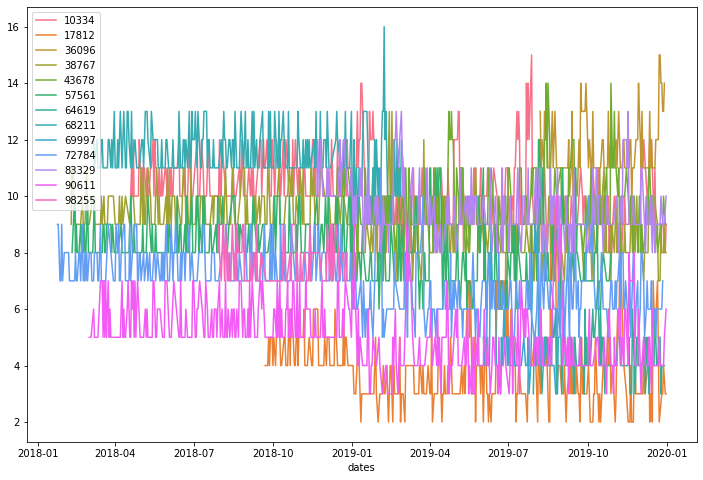

In [46]:
plt.figure(figsize=(12,8))
sns.lineplot(data=pivot_t,dashes=False)

In [69]:
promo_df = pd.read_csv('promo_1510002.csv')

In [73]:
promo_df

,year,week_num,SKU,discount
0,2019,1,90611,0.10
1,2019,2,10334,0.10
2,2019,3,68211,0.10
3,2019,4,10334,0.10
4,2019,5,72784,0.20
5,2019,6,68211,0.10
6,2019,7,38767,0.10
7,2019,8,83329,0.10
8,2019,9,83329,0.05
9,2019,10,90611,0.10


In [72]:
promo_df.discount = 1 - promo_df.discount

In [49]:
df_1510002['year'] = df_1510002.dates.dt.year
df_1510002['week_num'] = df_1510002.dates.dt.week
df_1510002 = df_1510002[df_1510002.dates >= pd.to_datetime('2019-01-01')]

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [50]:
df_72784 =  df_1510002[df_1510002.SKU == 72784]

In [51]:
df_72784.groupby(['year','week_num']).num_purchases.max().reset_index()

,year,week_num,num_purchases
0,2019,1,8
1,2019,2,7
2,2019,3,7
3,2019,4,7
4,2019,5,11
5,2019,6,6
6,2019,7,6
7,2019,8,8
8,2019,9,8
9,2019,10,8


In [52]:
df_1510002 = df_1510002.merge(promo_df, how='left', on= ['SKU', 'year', 'week_num'])

In [53]:
df_1510002['real_price_per_sku'] = df_1510002.price_per_sku * (1+df_1510002.discount)

In [54]:
df_1510002[~df_1510002.discount.isnull()]

,dates,SKU,price_per_sku,num_purchases,year,week_num,discount,real_price_per_sku
0,2019-01-01,90611,79.5420,7,2019,1,0.1,87.49620
13,2019-01-02,90611,79.5420,7,2019,1,0.1,87.49620
20,2019-01-03,90611,79.5420,9,2019,1,0.1,87.49620
27,2019-01-04,90611,79.5420,6,2019,1,0.1,87.49620
35,2019-01-05,90611,79.5420,6,2019,1,0.1,87.49620
...,...,...,...,...,...,...,...,...
2285,2019-12-26,36096,119.3868,14,2019,52,0.1,131.32548
2298,2019-12-27,36096,119.3868,13,2019,52,0.1,131.32548
2299,2019-12-28,36096,119.3868,13,2019,52,0.1,131.32548
2305,2019-12-29,36096,119.3868,14,2019,52,0.1,131.32548


# 1510003 group

In [55]:
df_1 = pd.read_csv('1510003_agr.csv')

In [56]:
df_1

,dates,SKU,price_per_sku,num_purchases
0,2018-11-17,54404,80.095,11
1,2018-11-18,54404,80.095,12
2,2018-11-19,54404,81.796,10
3,2018-11-20,54404,81.796,11
4,2018-11-21,54404,81.796,10
...,...,...,...,...
2846,2019-12-27,49661,165.978,10
2847,2019-12-28,49661,165.978,9
2848,2019-12-29,49661,165.978,10
2849,2019-12-30,49661,159.205,8


In [57]:
conc_df = pd.read_csv('conc_df.csv')

In [58]:
conc_df

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835
...,...,...,...,...,...
3004,89272,2019,18,2,133.93820
3005,89272,2019,18,3,121.76200
3006,80308,2019,47,1,115.77984
3007,80308,2019,47,2,118.19192


In [59]:
df_1[df_1.SKU.isin(conc_df.SKU.unique())]

,dates,SKU,price_per_sku,num_purchases
0,2018-11-17,54404,80.095,11
1,2018-11-18,54404,80.095,12
2,2018-11-19,54404,81.796,10
3,2018-11-20,54404,81.796,11
4,2018-11-21,54404,81.796,10
...,...,...,...,...
2846,2019-12-27,49661,165.978,10
2847,2019-12-28,49661,165.978,9
2848,2019-12-29,49661,165.978,10
2849,2019-12-30,49661,159.205,8


In [60]:
df_1.dates = pd.to_datetime(df_1.dates)

In [61]:
df_1['year'] = df_1.dates.dt.year
df_1['week_num'] = df_1.dates.dt.week

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [62]:
conc_aggr = conc_df.groupby(['SKU', 'year', 'week_num']).price_per_sku.agg(['min', 'max']).reset_index()

In [63]:
df_1 = df_1.merge(conc_aggr, how='left', on=['SKU','year', 'week_num'])

In [64]:
df_80308 = df_1[df_1.SKU == 80308]

In [65]:
df_80308

,dates,SKU,price_per_sku,num_purchases,year,week_num,min,max
853,2018-07-17,80308,113.940,8,2018,29,NaN,NaN
854,2018-07-18,80308,113.940,8,2018,29,NaN,NaN
855,2018-07-20,80308,113.940,8,2018,29,NaN,NaN
856,2018-07-21,80308,113.940,7,2018,29,NaN,NaN
857,2018-07-22,80308,113.940,8,2018,29,NaN,NaN
...,...,...,...,...,...,...,...,...
1235,2019-12-27,80308,122.536,10,2019,52,122.536,147.0432
1236,2019-12-28,80308,122.536,9,2019,52,122.536,147.0432
1237,2019-12-29,80308,122.536,9,2019,52,122.536,147.0432
1238,2019-12-30,80308,116.475,7,2019,1,111.816,128.1225


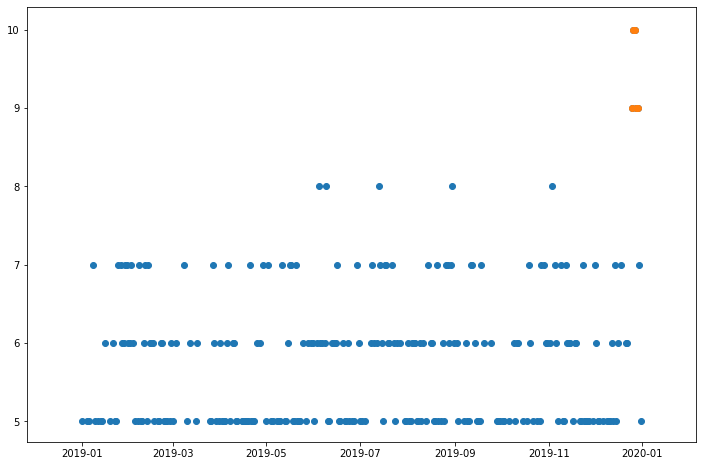

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(x = df_80308[df_80308.price_per_sku >= df_80308['min']].dates, y =df_80308[df_80308.price_per_sku >= df_80308['min']].num_purchases)
plt.scatter(x =df_80308[df_80308.price_per_sku <= df_80308['min']].dates, y=df_80308[df_80308.price_per_sku <= df_80308['min']].num_purchases)

## Прогнозирование временных рядов

In [99]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

In [81]:
ZX_df = pd.read_csv('ZX10208_agr.csv')
ZX_df['dates'] = pd.to_datetime(ZX_df.dates)
pivot_t = ZX_df.pivot_table(index='dates',columns='SKU', values='price_per_sku')

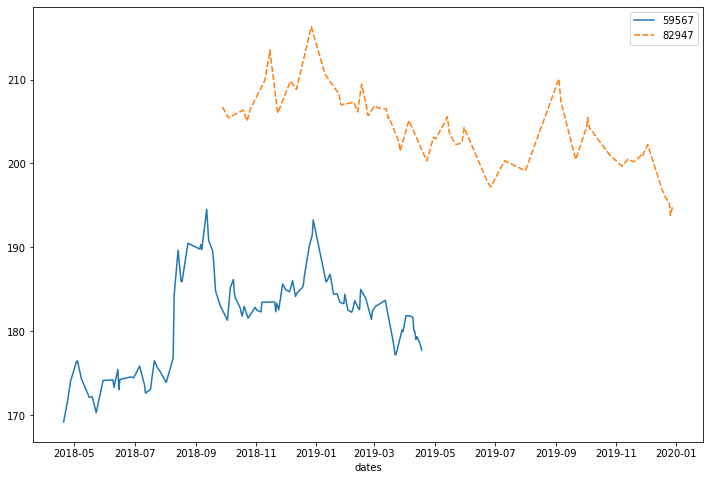

In [82]:
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

In [83]:
ZX_df['price_per_sku'] = ZX_df.groupby('SKU').price_per_sku.ffill()

In [85]:
df_59567 = ZX_df[ZX_df.SKU == 59567]

In [89]:
train_df = df_59567[df_59567.dates <= pd.to_datetime('2019-04-01')]
test_df = df_59567[df_59567.dates > pd.to_datetime('2019-04-01')]

In [135]:
print(train_df.shape)
print(test_df.shape)

(145, 4)
(11, 10)


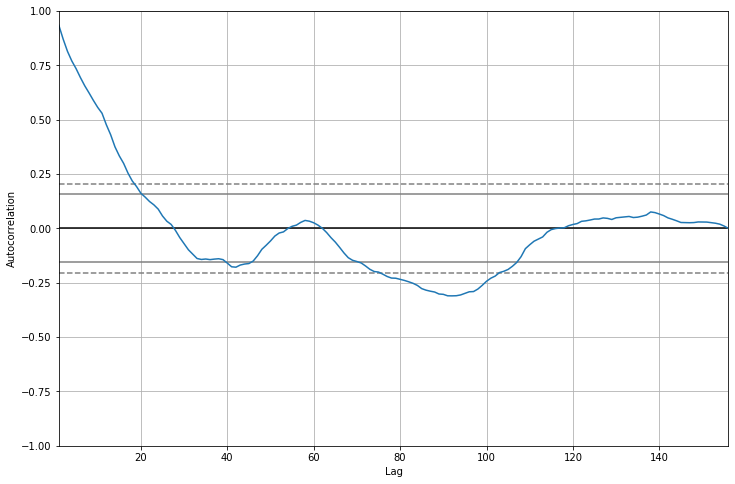

In [86]:
plt.figure(figsize=(12,8))
autocorrelation_plot(df_59567.price_per_sku.values)

In [90]:
#1 Autoregression
AR = AutoReg(train_df.price_per_sku.values, lags=20)
AR_model = AR.fit()

In [91]:
AR_model.params

array([ 1.60820207e+01,  1.06938563e+00, -1.46162089e-01, -1.30899380e-01,
        1.57571721e-01,  6.47218415e-02, -1.11758222e-01,  5.59600227e-02,
       -3.76933446e-02,  1.47311386e-02, -6.18697944e-02,  2.73159049e-01,
       -3.18091136e-01,  1.60588852e-01, -7.09107645e-02, -6.92044450e-02,
        1.41846291e-01, -1.33862976e-01,  4.72945316e-02,  4.09616542e-02,
       -3.34062939e-02])

In [92]:
AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1, 
                 dynamic=False)

array([180.44857402, 180.4443652 , 180.87926656, 181.70071796,
       180.70814628, 181.08981343, 181.11552473, 181.10372658,
       182.38490989, 182.0267328 , 182.55686698])

In [100]:
test_df['AR_model_prediction'] = AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1, 
                 dynamic=False)

In [94]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction
192,2019-04-02,59567,181.86,2,180.448574
194,2019-04-06,59567,181.83,2,180.444365
195,2019-04-08,59567,181.83,1,180.879267
196,2019-04-09,59567,181.67,1,181.700718
197,2019-04-10,59567,180.08,2,180.708146
198,2019-04-11,59567,179.97,2,181.089813
199,2019-04-12,59567,179.03,1,181.115525
200,2019-04-13,59567,179.36,1,181.103727
202,2019-04-16,59567,178.61,2,182.384910
203,2019-04-18,59567,177.77,1,182.026733


In [101]:
# Moving Avarage
MA = ARIMA(train_df.price_per_sku.values, order=(0,0,20))
MA_model = MA.fit()

In [96]:
MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([181.1411973 , 180.97153481, 181.78479433, 182.45938971,
       181.10404348, 181.8960975 , 181.05864524, 181.7544814 ,
       182.56178024, 181.3105422 , 182.60947083])

In [102]:
test_df['MA_model_prediction'] = MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [98]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141197
194,2019-04-06,59567,181.83,2,180.444365,180.971535
195,2019-04-08,59567,181.83,1,180.879267,181.784794
196,2019-04-09,59567,181.67,1,181.700718,182.459390
197,2019-04-10,59567,180.08,2,180.708146,181.104043
198,2019-04-11,59567,179.97,2,181.089813,181.896098
199,2019-04-12,59567,179.03,1,181.115525,181.058645
200,2019-04-13,59567,179.36,1,181.103727,181.754481
202,2019-04-16,59567,178.61,2,182.384910,182.561780
203,2019-04-18,59567,177.77,1,182.026733,181.310542


In [103]:
# Autoregressive moving average(ARMA)
ARMA = ARIMA(train_df.price_per_sku.values, order=(1,0,1))
ARMA_model = ARMA.fit()

In [104]:
ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([179.97184905, 179.9823484 , 179.99237896, 180.00196165,
       180.01111649, 180.01986255, 180.02821811, 180.0362006 ,
       180.04382667, 180.05111223, 180.0580725 ])

In [105]:
test_df['ARMA_model_prediction'] = ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [106]:
# Autoregressive Integrated Moving Average
ARIMA_ = ARIMA(train_df.price_per_sku.values, order=(20,1,20))
ARIMA_model = ARIMA_.fit()

In [107]:
ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([180.83419547, 180.48032031, 180.31605765, 181.11192182,
       178.6975036 , 179.13991888, 177.75230121, 177.77676229,
       179.94879324, 178.96750661, 180.37365968])

In [108]:
test_df['ARIMA_model_prediction'] = ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [109]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141197,179.971849,180.834195
194,2019-04-06,59567,181.83,2,180.444365,180.971535,179.982348,180.480320
195,2019-04-08,59567,181.83,1,180.879267,181.784794,179.992379,180.316058
196,2019-04-09,59567,181.67,1,181.700718,182.459390,180.001962,181.111922
197,2019-04-10,59567,180.08,2,180.708146,181.104043,180.011116,178.697504
198,2019-04-11,59567,179.97,2,181.089813,181.896098,180.019863,179.139919
199,2019-04-12,59567,179.03,1,181.115525,181.058645,180.028218,177.752301
200,2019-04-13,59567,179.36,1,181.103727,181.754481,180.036201,177.776762
202,2019-04-16,59567,178.61,2,182.384910,182.561780,180.043827,179.948793
203,2019-04-18,59567,177.77,1,182.026733,181.310542,180.051112,178.967507


In [136]:
# Seasonal Autoregressive Integrated Moving-Average 
SARIMA = SARIMAX(train_df.price_per_sku.values, order=(20,1,20), seasonal= (0,0,0,0))
SARIMA_model = SARIMA.fit()

In [112]:
SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([180.83419547, 180.48032031, 180.31605765, 181.11192182,
       178.6975036 , 179.13991888, 177.75230121, 177.77676229,
       179.94879324, 178.96750661, 180.37365968])

In [113]:
test_df['SARIMA_model_prediction'] = SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [114]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction,SARIMA_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141197,179.971849,180.834195,180.834195
194,2019-04-06,59567,181.83,2,180.444365,180.971535,179.982348,180.480320,180.480320
195,2019-04-08,59567,181.83,1,180.879267,181.784794,179.992379,180.316058,180.316058
196,2019-04-09,59567,181.67,1,181.700718,182.459390,180.001962,181.111922,181.111922
197,2019-04-10,59567,180.08,2,180.708146,181.104043,180.011116,178.697504,178.697504
198,2019-04-11,59567,179.97,2,181.089813,181.896098,180.019863,179.139919,179.139919
199,2019-04-12,59567,179.03,1,181.115525,181.058645,180.028218,177.752301,177.752301
200,2019-04-13,59567,179.36,1,181.103727,181.754481,180.036201,177.776762,177.776762
202,2019-04-16,59567,178.61,2,182.384910,182.561780,180.043827,179.948793,179.948793
203,2019-04-18,59567,177.77,1,182.026733,181.310542,180.051112,178.967507,178.967507


In [115]:
# Simple Exponential Smoothing
SES = SimpleExpSmoothing(train_df.price_per_sku.values)
SES_model = SES.fit()

In [116]:
SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([179.96, 179.96, 179.96, 179.96, 179.96, 179.96, 179.96, 179.96,
       179.96, 179.96, 179.96])

In [117]:
test_df['SES_model_prediction'] = SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [118]:
test_df

,dates,SKU,price_per_sku,num_purchases,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction,SARIMA_model_prediction,SES_model_prediction
192,2019-04-02,59567,181.86,2,180.448574,181.141197,179.971849,180.834195,180.834195,179.96
194,2019-04-06,59567,181.83,2,180.444365,180.971535,179.982348,180.480320,180.480320,179.96
195,2019-04-08,59567,181.83,1,180.879267,181.784794,179.992379,180.316058,180.316058,179.96
196,2019-04-09,59567,181.67,1,181.700718,182.459390,180.001962,181.111922,181.111922,179.96
197,2019-04-10,59567,180.08,2,180.708146,181.104043,180.011116,178.697504,178.697504,179.96
198,2019-04-11,59567,179.97,2,181.089813,181.896098,180.019863,179.139919,179.139919,179.96
199,2019-04-12,59567,179.03,1,181.115525,181.058645,180.028218,177.752301,177.752301,179.96
200,2019-04-13,59567,179.36,1,181.103727,181.754481,180.036201,177.776762,177.776762,179.96
202,2019-04-16,59567,178.61,2,182.384910,182.561780,180.043827,179.948793,179.948793,179.96
203,2019-04-18,59567,177.77,1,182.026733,181.310542,180.051112,178.967507,178.967507,179.96


In [119]:
# VAR
# VARMA
# VARMAX

In [120]:
import torch
from torch import nn
from torch.autograd import Variable as V
from torch import optim
import torchvision as tv
import torchvision.transforms as tf

In [121]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [122]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_df.price_per_sku.values .reshape(-1, 1))

In [124]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [125]:
train_data_normalized

tensor([-1.0000, -0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238,
        -0.5927, -0.5927, -0.5927, -0.7680, -0.7624, -0.9116, -0.6093, -0.6030,
        -0.6748, -0.6748, -0.5051, -0.6946, -0.5998, -0.5998, -0.5762, -0.5841,
        -0.5841, -0.4736, -0.4736, -0.6527, -0.7285, -0.7285, -0.6938, -0.5525,
        -0.4230, -0.4230, -0.4878, -0.5122, -0.5122, -0.5122, -0.6275, -0.6275,
        -0.4002,  0.1902,  0.6156,  0.3236,  0.3197,  0.3197,  0.6819,  0.6819,
         0.6267,  0.6685,  0.6219,  0.6219,  0.6219,  1.0000,  0.7064,  0.7064,
         0.6093,  0.5122,  0.2313,  0.2313,  0.2313,  0.0892,  0.0892, -0.0426,
         0.2652,  0.2652,  0.3402,  0.2163,  0.1681,  0.1681,  0.0734,  0.0245,
        -0.0032,  0.0868,  0.0868, -0.0237,  0.0781,  0.0513,  0.0513,  0.0355,
         0.1263,  0.1263,  0.1263,  0.1294,  0.0371,  0.1168,  0.0545,  0.0545,
         0.0545,  0.2391,  0.2991,  0.2447,  0.2257,  0.2897,  0.3307,  0.3307,
         0.1807,  0.2202,  0.2202,  0.26

In [126]:
def create_inout_sequences(input_data, tw=11):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [127]:
train_inout_seq = create_inout_sequences(train_data_normalized, tw=11)

In [128]:
train_inout_seq

[(tensor([-1.0000, -0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238,
          -0.5927, -0.5927, -0.5927]),
  tensor([-0.7680])),
 (tensor([-0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927,
          -0.5927, -0.5927, -0.7680]),
  tensor([-0.7624])),
 (tensor([-0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927,
          -0.5927, -0.7680, -0.7624]),
  tensor([-0.9116])),
 (tensor([-0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927,
          -0.7680, -0.7624, -0.9116]),
  tensor([-0.6093])),
 (tensor([-0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680,
          -0.7624, -0.9116, -0.6093]),
  tensor([-0.6030])),
 (tensor([-0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680, -0.7624,
          -0.9116, -0.6093, -0.6030]),
  tensor([-0.6748])),
 (tensor([-0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680, -0.7624, -0.9116,
          -0.6093, -0.6030, -0.6748]),
  tensor([-0.6748])),

In [129]:
epochs = 80

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%10 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.02080892
epoch:  11 loss: 0.00310560
epoch:  21 loss: 0.00071738
epoch:  31 loss: 0.00000512
epoch:  41 loss: 0.00000000
epoch:  51 loss: 0.00047642
epoch:  61 loss: 0.00004787
epoch:  71 loss: 0.01555970
epoch:  79 loss: 0.0173519235


In [130]:
test_inputs = train_data_normalized[-11:].tolist()

In [131]:
model.eval()

for i in range(11):
    seq = torch.FloatTensor(test_inputs[-11:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [132]:
test_inputs[11:]

[-0.17209258675575256,
 -0.16259273886680603,
 -0.12296204268932343,
 -0.04300084710121155,
 0.04384655877947807,
 0.125918447971344,
 0.2013656347990036,
 0.27468109130859375,
 0.3663773238658905,
 0.45008495450019836,
 0.5124920010566711]

https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

## План прогноза спроса

<img src="Plan_spros.png" width="800">

## Расчет эластичности не примере 

In [7]:
cnt= [i for i in range(0,110,10)]
price = sorted([i for i in range(1,11)], reverse=True)

In [11]:
df = pd.DataFrame(zip(cnt,price), columns=['cnt', 'price'])

In [12]:
df

,cnt,price
0,0,10
1,10,9
2,20,8
3,30,7
4,40,6
5,50,5
6,60,4
7,70,3
8,80,2
9,90,1



$E_{pd} = \frac{\Delta Q}{\Delta P}*\frac{P}{Q} = \frac{(P_1+P_2)\Delta Q}{(Q_1+Q_2)\Delta P}$

In [14]:
df['prev_price'] = df.price.shift()
df['prev_cnt'] = df.cnt.shift()

In [15]:
df

,cnt,price,prev_price,prev_cnt
0,0,10,NaN,NaN
1,10,9,10.0,0.0
2,20,8,9.0,10.0
3,30,7,8.0,20.0
4,40,6,7.0,30.0
5,50,5,6.0,40.0
6,60,4,5.0,50.0
7,70,3,4.0,60.0
8,80,2,3.0,70.0
9,90,1,2.0,80.0


In [20]:
df['elasticity_coef'] = None
df.loc[~df.prev_price.isnull(), 'elasticity_coef'] = np.abs(((df.prev_price+df.price)*(df.cnt-df.prev_cnt))
                                                            /((df.cnt+df.prev_cnt)*(df.price-df.prev_price)))

In [21]:
df

,cnt,price,prev_price,prev_cnt,elasticity_coef
0,0,10,NaN,NaN,None
1,10,9,10.0,0.0,19.0
2,20,8,9.0,10.0,5.666667
3,30,7,8.0,20.0,3.0
4,40,6,7.0,30.0,1.857143
5,50,5,6.0,40.0,1.222222
6,60,4,5.0,50.0,0.818182
7,70,3,4.0,60.0,0.538462
8,80,2,3.0,70.0,0.333333
9,90,1,2.0,80.0,0.176471


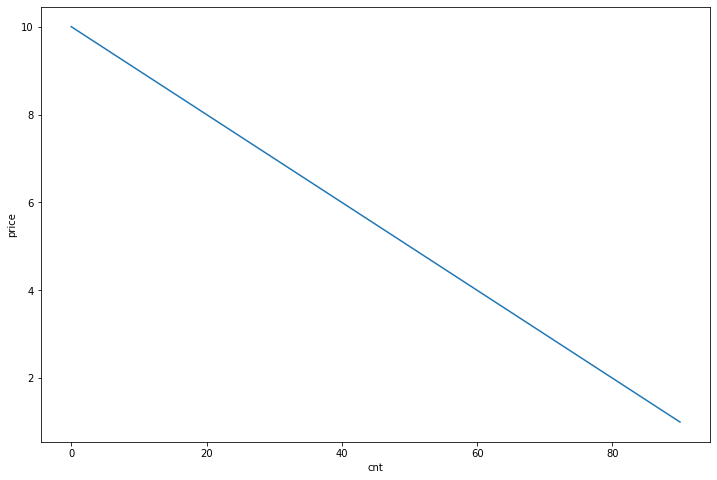

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(x =df['cnt'], y=df['price'])

## План разработки приложения для ценообразования
1) Выбрать товары для отдельного ценообразования

2) Для данных товаров построить модели предсказания спроса в зависимости от цены

3) Согласно выбранной стратегии компании выбрать, что именно мы будем оптимизировать

4) Корректировка цен относительно ограничений и цен конкурентов

5) Получение обратной связи по изменение спроса в зависимости от цены и возврат к пункту 2